In [141]:
from PIL import Image
im = Image.open(r"./group15/train/26.png")

# patches of size n*n
n=7

# getting consecuitve pathces of n*n from im
def get_patches(im):
    px = im.load()
    patches = []
    for i in range(0,  im.size[0] - n):
        for j in range(0, im.size[1] - n):
            patch = []
            for k in range(i, i + n):
                for l in range(j, j + n):
                    patch.append(px[k, l])
            patches.append(patch)
    return patches

import numpy as np
pathces = np.array(get_patches(im))

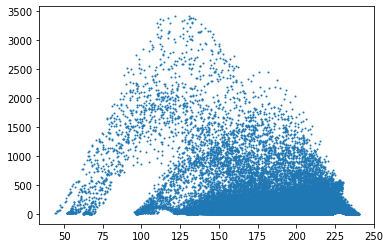

In [142]:
# plot the mean and covariance
import matplotlib.pyplot as plt
plt.scatter(mean, var, s=1)
plt.show()

In [143]:
# find mean and covariace of each patch
def mean_cov(patches):
    mean = np.mean(patches, axis=1)
    var = np.var(patches, axis=1)
    return mean, var
mean, var = mean_cov(pathces)
# making data points from mean and var
data = []
for i in range(len(mean)):
    data.append([mean[i], var[i]])
data = np.array(data)

(255025, 2)


In [144]:
import random
import numpy as np  # Import the numpy library for np.mean and np.var

class K_means:
    class cluster:
        def __init__(self, mean=None):
            self.mean = mean
            self.NoOfPoints = 0

        def center(self):
            return self.mean

    def dissimilarity(self, point1, point2):
        return np.linalg.norm(np.array(point1) - np.array(point2))
    
    def assign_cluster(self, point):
        min_dissimilarity = self.dissimilarity(point, self.clusters[0].center())
        cluster_index = 0
        for i in range(1, self.k):
            dissimilarity = self.dissimilarity(point, self.clusters[i].center())
            if dissimilarity < min_dissimilarity:
                min_dissimilarity = dissimilarity
                cluster_index = i
        return cluster_index

    def __init__(self, k):
        self.k = k
        self.clusters = [None for i in range(k)]

    def fit(self, data):
        # Initializing cluster centers
        centers = set()
        while len(centers) < self.k:
            centers.add(random.randint(0, len(data) - 1))
        centers = list(centers)

        self.clusters = [self.cluster(data[centers[i]]) for i in range(self.k)]
        
        

        iterations = 0
        while True:
            iterations += 1
            print("Iteration:", iterations,"means:", [self.clusters[i].mean for i in range(self.k)])
            
            new_clusters = [self.cluster() for i in range(self.k)]
            
            for point in data:
                cluster_index = self.assign_cluster(point)
                if(new_clusters[cluster_index].mean is None):
                    new_clusters[cluster_index].mean = point
                else:
                    new_clusters[cluster_index].mean += point
                new_clusters[cluster_index].NoOfPoints += 1
                    
            for i in range(self.k):
                new_clusters[i].mean /= new_clusters[i].NoOfPoints
                

            # Check for convergence by comparing cluster centers
            converged = True
            for i in range(self.k):
                if not np.array_equal(new_clusters[i].mean, self.clusters[i].mean):
                    converged = False
                    break

            if converged:
                break
            else:
                self.clusters = new_clusters
                

        print("Number of iterations:", iterations)
        return [self.assign_cluster(point) for point in data]

# Example usage:
# Create an instance of K_means with the desired number of clusters (k)
kmeans = K_means(3)
# Pass your data to the fit method to perform clustering
cluster_points = kmeans.fit(data)


Iteration: 1 means: [array([  95.42857143, 1299.87755102]), array([198.40816327,  35.79258642]), array([222.44897959, 342.45147855])]


Iteration: 2 means: [array([ 151.18972555, 1413.66607456]), array([218.0232848 ,  20.69959573]), array([191.78566358, 375.89869025])]
Iteration: 3 means: [array([ 160.24202674, 1631.38977468]), array([216.38498807,  47.55426508]), array([ 183.11223765, 1302.5781374 ])]
Iteration: 4 means: [array([ 159.89330331, 1895.15109113]), array([216.38485643,  47.55585039]), array([ 174.94897814, 1603.18218308])]
Number of iterations: 4


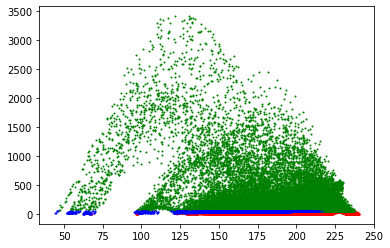

In [145]:
# Plot the clusters
colors = ['r', 'g', 'b', 'y', 'c', 'm']
for i in range(kmeans.k):
    cluster = np.array([data[j] for j in range(len(data)) if cluster_points[j] == i])
    plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i % len(colors)], s=1)
    

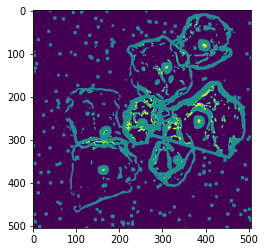

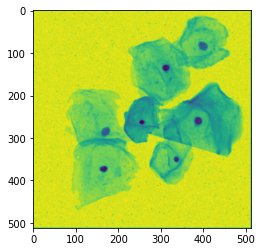

In [146]:
# plt the clusterings
# labels = np.array([cluster_point.cluster for cluster_point in cluster_points])
cluster_points = np.array(cluster_points)
plt.imshow(cluster_points.reshape(im.size[1] - n, im.size[0] - n).T)
plt.show()
# plt the image
plt.imshow(im)

In [147]:
class K_Mahalanobis:
    class cluster:
        def __init__(self, mean=None, cov=None):
            self.mean = mean
            self.NoOfPoints = 0
            self.cov=cov

        def center(self):
            return self.mean

    def mahalanobis(self, point, cluster_index):
        mean = self.clusters[cluster_index].mean
        covariance = self.clusters[cluster_index].cov
        
        diff = point - mean
        
        # also handle the case when covariance is singular
        inv_covariance = np.linalg.pinv(covariance)
        distance = np.sqrt(np.dot(np.dot(diff.T, inv_covariance), diff))
        
        return distance
    
    
    def assign_cluster(self, point):
        min_dissimilarity = self.mahalanobis(point,0)
        cluster_index = 0
        for i in range(1, self.k):
            dissimilarity = self.mahalanobis(point, i)
            if dissimilarity < min_dissimilarity:
                min_dissimilarity = dissimilarity
                cluster_index = i
        return cluster_index

    def __init__(self, k):
        self.k = k
        self.clusters = [None for i in range(k)]
    
    def plot(self, data):
        # ploting the mean
        for i in range(self.k):
            plt.scatter(self.clusters[i].mean[0],self.clusters[i].mean[1],c='black', s=10)
        
        
        labels = [self.assign_cluster(point) for point in data]
        for i in range(self.k):
            plt.scatter([point[0] for point in data],[point[1] for point in data],c=labels, s=1)
        plt.show()

    def fit(self, data):
        # Initializing cluster centers
        centers = set()
        while len(centers) < self.k:
            centers.add(random.randint(0, len(data) - 1))
        centers = list(centers)

        self.clusters = [self.cluster(data[centers[i]]) for i in range(self.k)]
        for i in range(self.k):
            self.clusters[i].cov = np.identity(len(data[0]))
        

        iterations = 0
        while True:
            self.plot(data)
            iterations += 1
            if(iterations>1):
                break
            print("Iteration:", iterations,"means:", [self.clusters[i].mean for i in range(self.k)])
            print("cov", [self.clusters[i].cov for i in range(self.k)])
            
            new_clusters = [self.cluster() for i in range(self.k)]
            
            for point in data:
                cluster_index = self.assign_cluster(point)
                if(new_clusters[cluster_index].mean is None):
                    new_clusters[cluster_index].mean = point
                else:
                    new_clusters[cluster_index].mean += point
                new_clusters[cluster_index].NoOfPoints += 1
                    
            for i in range(self.k):
                new_clusters[i].mean /= new_clusters[i].NoOfPoints
                
           
            
            for point in data:
                cluster_index = self.assign_cluster(point)
                if(new_clusters[cluster_index].cov is None):
                    new_clusters[cluster_index].cov = np.outer((point-new_clusters[cluster_index].mean),(point-new_clusters[cluster_index].mean))
                else:
                    new_clusters[cluster_index].cov += np.outer((point-new_clusters[cluster_index].mean),(point-new_clusters[cluster_index].mean))
            
            for i in range(self.k):
                new_clusters[i].cov /= new_clusters[i].NoOfPoints
                
            
             

            # Check for convergence by comparing cluster centers
            converged = True
            for i in range(self.k):
                if not np.array_equal(new_clusters[i].mean, self.clusters[i].mean):
                    converged = False
                    break

            if converged:
                break
            else:
                self.clusters = new_clusters
                

        print("Number of iterations:", iterations)
        return [self.assign_cluster(point) for point in data]


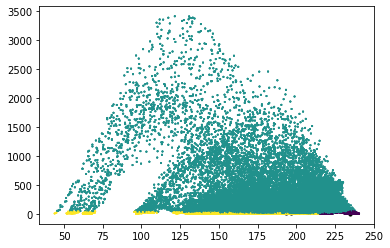

Iteration: 1 means: [array([234.85714286,   2.32653061]), array([196.67346939,  21.85256143]), array([193.51020408,   8.65805914])]
cov [array([[1., 0.],
       [0., 1.]]), array([[1., 0.],
       [0., 1.]]), array([[1., 0.],
       [0., 1.]])]


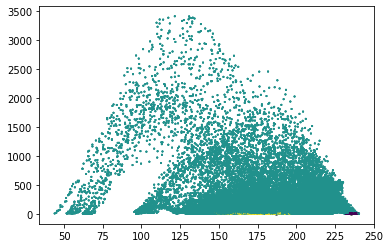

Number of iterations: 2


[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [148]:
Kmahalanobis = K_Mahalanobis(3)
Kmahalanobis.fit(data)
    

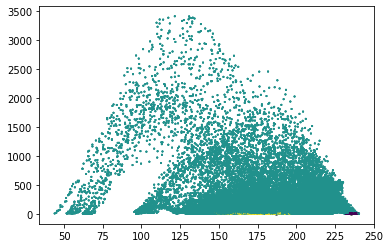

In [149]:

Kmahalanobis.plot(data)

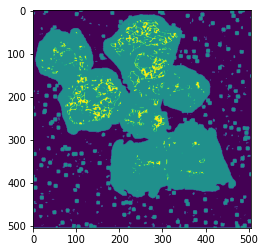

In [150]:
labels=[Kmahalanobis.assign_cluster(point) for point in data]
labels = np.array(labels)
plt.imshow(labels.reshape(im.size[0] - n, im.size[1] - n)[::-1])


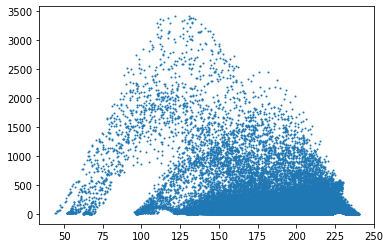

In [151]:
#plot the labels
import matplotlib.pyplot as plt
plt.scatter(mean, var, s=1,)
plt.show()

In [152]:
a=np.array([1,2])
b=np.array([3,4])
print(np.outer(a,b))

[[3 4]
 [6 8]]
